In [1]:
import prtools as pr
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from jupyterthemes import jtplot
jtplot.style(theme="oceans16")

In [145]:
help (pr.gendath)

Help on function gendath in module prtools.prtools:

gendath(n=(50, 50))
    Generation of Highleyman classes
    
        A = gendath(N)
    
    Generation of a 2-dimensional 2-class dataset A of N objects
    according to Highleyman. 
    
    The two Highleyman classes are defined by 
    1: Gauss([1 1],[1 0; 0 0.25]).
    2: Gauss([2 0],[0.01 0; 0 4]).
    Class priors are P(1) = P(2) = 0.5



# Exercise 3.3

In [2]:
def genstdNoise(x):
    return np.random.randn(x.shape[0], x.shape[1])

(a)\
Regularization can have quite a beneficial effect.

In [3]:
x_train = np.random.uniform(low=0.0, high=1.0, size=(100,1))
y_train = x_train + genstdNoise(x_train)
x_test = np.random.uniform(low=0.0, high=1.0,size=(10000,1))
y_test = x_test + genstdNoise(x_test)

trainData = pr.gendatr(x_train,targets=y_train)
testData = pr.gendatr(x_test,targets=y_test)

print("trainData shape: ", trainData.shape)
print("testData shape: ", testData.shape)

trainData shape:  (100, 1)
testData shape:  (10000, 1)


SSE0: 10229.907830393295
w0: [[ 1.04383077]
 [-0.13882803]]
 
SSE1: 10227.8574398484
w1: [[ 1.03095445]
 [-0.13228786]]
 
SSE2: 10222.356468929538
w2: [[ 0.92900652]
 [-0.08086626]]
 
SSE3: 10423.00746726769
w3: [[0.50885443]
 [0.11587131]]
 
SSE4: 11382.796149512367
w4: [[0.15128422]
 [0.15272064]]
 
SSE5: 12906.289354856095
w5: [[0.02524949]
 [0.03347053]]
 


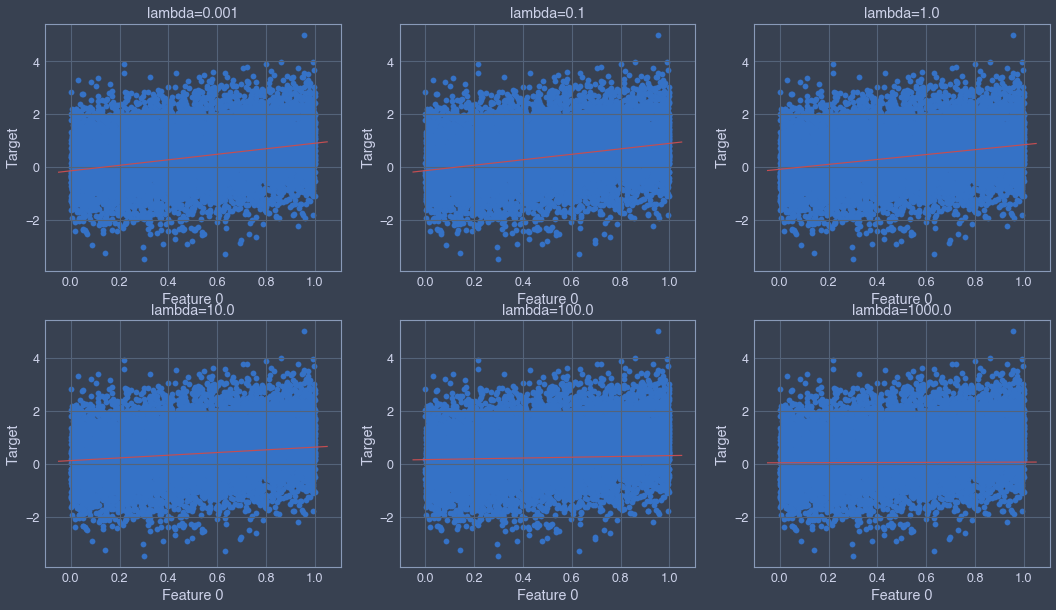

In [60]:
lamb = np.array([0.001, 0.1,1, 10, 100, 1000])
plt.figure(figsize=(18,10))
for i in range(len(lamb)):
    w = pr.ridger(trainData, lamb[i])
    y_hat = w(x_test)
    plt.subplot(2,3,i+1)
    pr.scatterr(testData)
    pr.plotr(w, color="r")
    plt.title("lambda="+str(lamb[i]))
    print("SSE"+str(i)+":", np.sum((+y_hat - +y_test)**2))
    print("w"+str(i)+":",+w)
    print(" ")

### squared error first decreases as the $\lambda$ increases from 0.001 to 1 bacause $\tau$ is inversely prop. to $\lambda$, and then the squared error increases as the $\lambda$ increases to 1000. Meanwhile $w$ shrinks to zero due to the large $\lambda$.
When the regularization parameters varying from 0 to 10(for instance), the regression line approaches to the line lying on the x axis. This means that $w<=\tau$ where $\tau$ decreases as $\lambda$ increases. Link to 3.1(e) w=0


(b)
### 拟合过程中倾向于让w尽可能小，最后构造一个所有参数都比较小的模型。原因：一般认为small parameter values 的model比较简单，能适应不同的数据集，在一定程度上避免了overfitting的现象。设想一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大影响；如果参数足够小，数据偏移得多一些也没有关系。【抗扰动能力强】

<function matplotlib.pyplot.show(*args, **kw)>

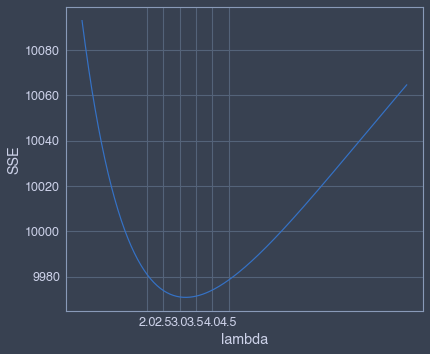

In [97]:
lamb = np.arange(0.01, 10, 0.05)
SSE = np.zeros(len(lamb))
for i in range (len(lamb)):
    w = pr.ridger(trainData, lamb[i])
    y_hat = w(x_test)
    SSE[i] = (np.sum((+y_hat - y_test)**2))

plt.plot(lamb,SSE)
plt.xlabel("lambda")
plt.ylabel("SSE")
plt.xticks(np.arange(2,5,0.5))
plt.show

The optimum for a training set size of 10 is $\lambda = 1.0$ \
The optimum for a training set size of 100 is $\lambda = 3.0$

# Exercise 3.4

See above. But cross validation will be better.

# Exercise 3.7

(a)
No, none of the entries ever become zero really. The probability that this happens is zero. 

### In the limit, for $\lambda$ is larger and larger, $w$ should shrink to zero.

In [108]:
x = np.random.randn(20,2)
y = x[:,0] + 0.2*np.random.randn(20)
data = pr.gendatr(x,y)

[[0.95487036]
 [0.08297768]
 [0.09452834]]


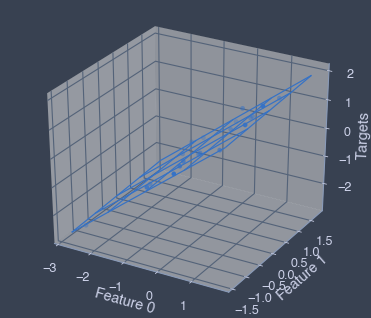

In [120]:
w = pr.ridger(data,0.01) #standard L2 regularization for different values of \lambda, from 0.001 to 1000
pr.scatterr(data)
pr.plotr(w, gridsize=5)
print(+w)

(b)\
In this setting, there will be a finite $\lambda$ for which at least one of the entries(the second) becomes zero. For an even larger $\lambda$, the other entry will become zero.\
Here we have two zero entries with $\lambda$=1.

[[ 0.        ]
 [ 0.        ]
 [-0.00166926]]


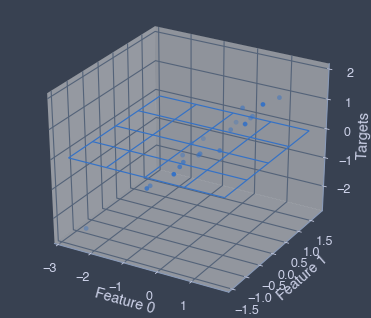

In [121]:
w = pr.lassor(data,1)
pr.scatterr(data)
pr.plotr(w, gridsize=5)
print(+w)

# Exercise 3.13

In [132]:
t = pr.gendath(n=(500,500))

In [134]:
for i in range (30):
    a = pr.gendath(n=(20,20))
    
    LDC = pr.ldc(a)
    error = pr.testc(LDC.eval(t))
    error1 = t * pr.ldc(a) * pr.testc() # given in pdf
    print("error rate: ",error1)

error rate:  0.199
error rate:  0.256
error rate:  0.171
error rate:  0.154
error rate:  0.173
error rate:  0.155
error rate:  0.158
error rate:  0.179
error rate:  0.159
error rate:  0.252
error rate:  0.217
error rate:  0.179
error rate:  0.169
error rate:  0.158
error rate:  0.141
error rate:  0.17
error rate:  0.222
error rate:  0.151
error rate:  0.22
error rate:  0.165
error rate:  0.15
error rate:  0.136
error rate:  0.178
error rate:  0.157
error rate:  0.25
error rate:  0.162
error rate:  0.254
error rate:  0.221
error rate:  0.167
error rate:  0.163


(a)\
The training set changes every time, so the fitting curve changes every time, resulting in the error rate changes every time.

In [136]:
a = pr.gendath(n=(20,20))
w = pr.ldc(a)

for i in range (30):
    t = pr.gendath(n=(500,500))
    error = pr.testc(w.eval(t))
    error1 = t * w * pr.testc()
    print("error rate: ",error1)

error rate:  0.222
error rate:  0.195
error rate:  0.188
error rate:  0.209
error rate:  0.196
error rate:  0.196
error rate:  0.205
error rate:  0.194
error rate:  0.21
error rate:  0.213
error rate:  0.186
error rate:  0.203
error rate:  0.192
error rate:  0.178
error rate:  0.209
error rate:  0.208
error rate:  0.224
error rate:  0.221
error rate:  0.212
error rate:  0.207
error rate:  0.226
error rate:  0.19
error rate:  0.214
error rate:  0.205
error rate:  0.19
error rate:  0.202
error rate:  0.22
error rate:  0.224
error rate:  0.202
error rate:  0.217


(b)
### Since the testing set changes every time, the error rate changes every time. The variance of the latter results is smaller than the former one.

# Exercise 3.14 Learning Curves

In [158]:
data = pr.gendath(n=(1000,1000))
feature = +data # What's the effect of plus sign
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)

Text(0.5, 1.0, 'Learning Curve')

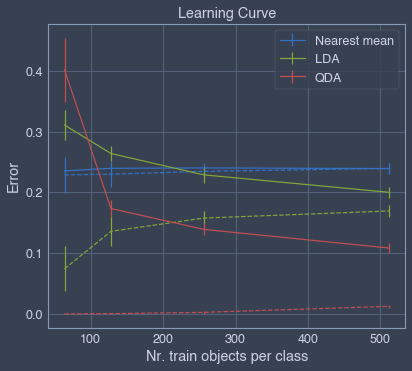

In [160]:
u = [pr.nmc(), pr.ldc(), pr.qdc()]
e_nmc = pr.cleval(noiseData, u[0], trainsize=[64, 128, 256, 512], nrreps=10) # default
e_ldc = pr.cleval(noiseData, u[1], trainsize=[64, 128, 256, 512], nrreps=10)
e_qdc = pr.cleval(noiseData, u[2], trainsize=[64, 128, 256, 512], nrreps=10)
plt.legend()
plt.title("Learning Curve")

(a)
### The error rate of the testing curve is decreasing, and the training curve is increasing. \
### Both curves should converge in the end. Where the curves converge depends on what classifier you use. More flexible classifiers get a low asymptotic error.\
With same amount of training data, QDA is above LDA above NMC, which indicates that the variance increases with the complexity.\
### Therefore, for the most complex classifier, the result of new samples in limited small amount will result in much more different results.

(b)
### The curves intersect because simpler classifier works generally better when sample sizes are small, while complex classifier works better in larger sample size. None of the classifier works best. They are suitable for different situations.

(c)\
I expect that the limiting behavior of learning curves is that training and test error converge to same value. QDA<LDA<NMC

# Exercise 3.15
### study learning curve for the 1NN classifier

In [173]:
data = pr.gendath(n=(500,500)) # generate Highleyman classes
feature = +data
label = pr.genlab(n=(500,500),lab=[-1,1])
noiseFeature = np.hstack((feature, np.random.rand(1000,60))) # 1000 rows and 60 columns
noiseData = pr.prdataset(noiseFeature, label)

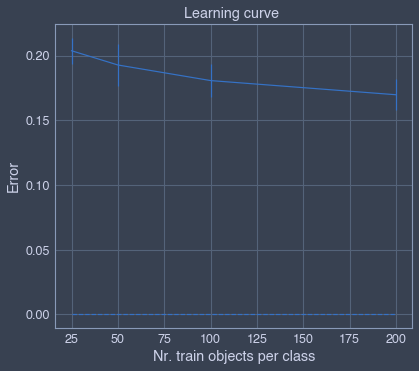

In [176]:
e_nmc = pr.cleval(noiseData, pr.knnc(1), trainsize=[25, 50, 100, 200], nrreps=10)

#### The 1-NN classifier has a zero apparent error.

# Exercise 3.16

Text(0.5, 1.0, 'Learning Curve of a simple classification data')

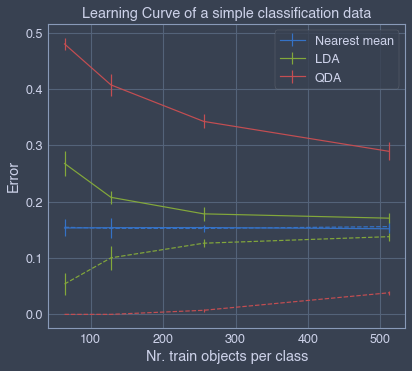

In [184]:
data = pr.gendats(n=(1000,1000)) # Generate a two-class dataset A from two DIM-dimensional Gaussian distributions
feature = +data # What's the effect of plus sign
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)
u = [pr.nmc(), pr.ldc(), pr.qdc()]
e_nmc = pr.cleval(noiseData, u[0], trainsize=[64, 128, 256, 512], nrreps=10) # default
e_ldc = pr.cleval(noiseData, u[1], trainsize=[64, 128, 256, 512], nrreps=10)
e_qdc = pr.cleval(noiseData, u[2], trainsize=[64, 128, 256, 512], nrreps=10)
plt.legend()
plt.title("Learning Curve of a simple classification data")

Text(0.5, 1.0, 'Learning Curve of a difficult classification data')

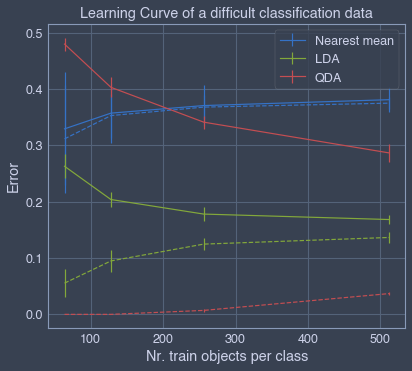

In [185]:
data = pr.gendatd(n=(1000,1000)) # Generate a two-class dataset A from two DIM-dimensional Gaussian distributions
feature = +data # What's the effect of plus sign
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)
u = [pr.nmc(), pr.ldc(), pr.qdc()]
e_nmc = pr.cleval(noiseData, u[0], trainsize=[64, 128, 256, 512], nrreps=10) # default
e_ldc = pr.cleval(noiseData, u[1], trainsize=[64, 128, 256, 512], nrreps=10)
e_qdc = pr.cleval(noiseData, u[2], trainsize=[64, 128, 256, 512], nrreps=10)
plt.legend()
plt.title("Learning Curve of a difficult classification data")

#### The curves will perform in a different kind of way because of the difference in data distributions and the way the classifiers fit these distributions.

# Exercise 3.17

Text(0.5, 1.0, 'Learning Curve for nmc with gendatc')

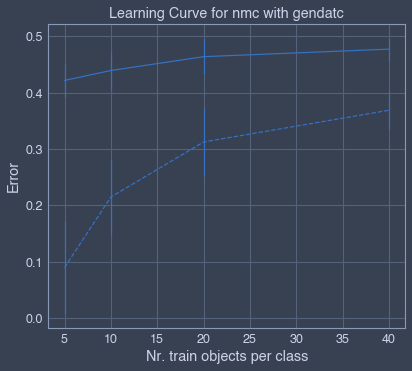

In [193]:
data = pr.gendatc(n=(1000,1000),dim=2, mu=0.0)
feature = +data 
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)
e_nmc = pr.cleval(noiseData, pr.nmc(), trainsize=[5, 10, 20, 40], nrreps=10) # default
plt.title("Learning Curve for nmc with gendatc")

#### The classifier fits better, though still badly, to the data when there are fewer data points. As a result we see the not-so-well-known Dipping Phenomenon .
phenomenon: particular classifiers attain their optimum performance at <u>a training set size which is finite.</u> \
ref: https://rdcu.be/ccxYS

# Exercise 3.19

This dataset consists of features of handwritten numerals (0-9) extracted from a collection of Dutch utility maps. 200 patterns per class (for a total of 2,000 patterns) have been digitized in binary images.\
In each file the 2000 patterns are stored in ASCI on 2000 lines. The first 200 patterns are of class 0, followed by sets of 200 patterns for each of the classes 1-9. Corresponding patterns in different feature sets (files) correspond to the same original character.

In [196]:
help (np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
        The char

In [197]:
help (pr.genlab)

Help on function genlab in module prtools.dataset:

genlab(n, lab)



In [202]:
kar = np.loadtxt("mfeat-kar.txt", dtype=np.float64)
label = pr.genlab(n=[200]*10, lab = [0,1,2,3,4,5,6,7,8,9])
data = pr.prdataset(kar, targets=label)
print(data)

2000 by 64 prdataset with 10 classes: [200 200 200 200 200 200 200 200 200 200]


In [199]:
help (pr.clevalf)

Help on function clevalf in module prtools.prtools:

clevalf(a, u, trainsize=0.6, nrreps=5, testfunc=<function testc at 0x7f8e41d89670>)
    Feature curve
    
           E = clevalf(A,U,TRAINSIZE,NRREPS)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A for varying feature set sizes. The nr of features is from
    1 to the nr of features in A. For K features, the classifier is
    trained on A[:,:K]
    To get reliable estimates, the train-test split is repeated NRREPS=5
    times.
    
    Example:
    a = gendatb([100,100])
    u = nmc()
    e = clevalf(a,u,nrreps=10)



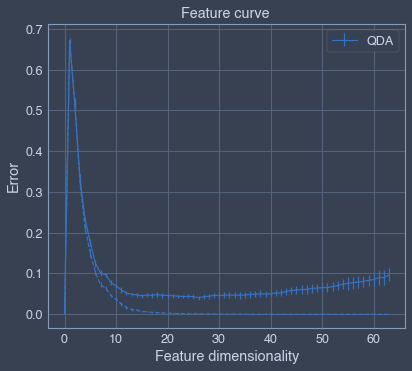

In [205]:
classifier = pr.qdc()
e_qdc = pr.clevalf(data, classifier,trainsize=0.4,nrreps=10) # trainsize is the percentage of data to be used
plt.legend()
plt.show()

(a)\
When you do not change the training set, nothing will change during the redoing of the experiment. In the function <b>clevalf</b> each time the first 4, 8, 16, 32 or 64 features are used, so there is no randomization is used here.\
(b)\
You only get the first part of the learning curve, because less data is available. When you use only 40% of the data, you tend to see only overfitting on the training set.

# Exercise 3.20

##### Generate a small data set using gendatb, say, with 10 objects per class.

In [206]:
help (pr.gendatb)

Help on function gendatb in module prtools.prtools:

gendatb(n=(50, 50), s=1.0)
    Generation of a banana shaped classes
    
        A = gendatb(N,S)
    
    Generate a two-dimensional, two-class dataset A of N objects with a
    banana shaped distribution. The data is uniformly distributed along
    the bananas and is superimposed with a normal distribution with
    standard deviation S in all directions. Class priors are P(1) = P(2)
    = 0.5.
    Defaults: N = [50,50], S = 1.



(a)

In [209]:
help (np.round)

Help on function round_ in module numpy:

round_(a, decimals=0, out=None)
    Round an array to the given number of decimals.
    
    See Also
    --------
    around : equivalent function; see for details.



In [211]:
help (pr.prcrossval)

Help on function prcrossval in module prtools.prtools:

prcrossval(a, u, k=10, nrrep=1, testfunc=<function testc at 0x7f8e41d89670>)
    Performance estimation using crossvalidation
    
           E = prcrossval(A,U,K,NRREP)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A by using K-fold (stratified) crossvalidation. If required,
    the crossvalidation can be repeated NRREP times, to get a better
    estimate.
    
    Example:
    a = gendatb()
    u = nmc()
    e = prcrossval(a,u,k=10)



In [212]:
data = pr.gendatb(n=(10,10),s=2.0)
knn1 = pr.knnc((1))
knn3 = pr.knnc((3))

for n in range(2,11):
    # performing the cross-validation 10 times
    e_knn1 = pr.prcrossval(data, knn1, k=n, nrrep=3) 
    e_knn3 = pr.prcrossval(data, knn3, k=n, nrrep=3)
    
    e1 = np.sum(e_knn1, axis=1)/e_knn1.shape[1]
    e3 = np.sum(e_knn3, axis=1)/e_knn3.shape[1]
    
    print("N= " + str(n), "\t", "mean","\t", "variance")
    print("1-NN \t", np.round(np.mean(e1),3), "\t", np.round(np.var(e1),3))
    print("3-NN \t", np.round(np.mean(e3),3), "\t", np.round(np.var(e3),3))
    print()

N= 2 	 mean 	 variance
1-NN 	 0.333 	 0.001
3-NN 	 0.4 	 0.0

N= 3 	 mean 	 variance
1-NN 	 0.389 	 0.014
3-NN 	 0.454 	 0.001

N= 4 	 mean 	 variance
1-NN 	 0.354 	 0.01
3-NN 	 0.451 	 0.008

N= 5 	 mean 	 variance
1-NN 	 0.367 	 0.024
3-NN 	 0.5 	 0.014

N= 6 	 mean 	 variance
1-NN 	 0.444 	 0.036
3-NN 	 0.542 	 0.025

N= 7 	 mean 	 variance
1-NN 	 0.452 	 0.059
3-NN 	 0.512 	 0.033

N= 8 	 mean 	 variance
1-NN 	 0.438 	 0.033
3-NN 	 0.521 	 0.026

N= 9 	 mean 	 variance
1-NN 	 0.417 	 0.034
3-NN 	 0.546 	 0.051

N= 10 	 mean 	 variance
1-NN 	 0.433 	 0.046
3-NN 	 0.517 	 0.064



(b,c)\
Typically you get a <b>less biased estimate of the error</b> when you <b>increase n</b>, but the <b>variance increases a bit</b> with larger n. 

(d)\
For a larger dataset, the bias and the variance are a bit smaller.

# Exercise 3.22

(b) lab is the true target, whereas lab2 is the predicted target

# Exercise 3.23

In [216]:
# C(i, j) gives the number of objects that are from i, but are labeled as j.
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

##### (a)

In [217]:
# Load the digits data sets mfeat zer and mfeat kar.
kar = np.loadtxt("mfeat-kar.txt", dtype = np.float64)
zer = np.loadtxt("mfeat-zer.txt", dtype = np.float64)
label = pr.genlab(n=[200]*10, lab = [0,1,2,3,4,5,6,7,8,9])
data_kar = kar
data_zer = zer

print("kar ser: ", data_kar.shape)
print("zer set: ", data_zer.shape)

kar ser:  (2000, 64)
zer set:  (2000, 47)


In [219]:
help (train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [220]:
x_train, x_test, y_train, y_test = train_test_split(data_kar, label, test_size = 0.33, random_state = 42)
print("total test sample: ", len(x_test))

total test sample:  660


In [223]:
help (confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [222]:
qdc = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
y_hat = qdc.predict(x_test)
print(confusion_matrix(y_test, y_hat, labels= [0,1,2,3,4,5,6,7,8,9]))
error = np.sum(y_hat != y_test)/ len(y_hat)
print("error rate: ",error)

[[51  0  0  0  0  2  0  0  1  0]
 [ 0 73  0  0  0  2  0  0  0  0]
 [ 0  0 79  0  0  0  0  0  0  1]
 [ 0  0  0 58  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0]
 [ 0  0  0  2  0 56  0  0  0  0]
 [ 0  0  0  0  1  2 61  0  2  0]
 [ 0  0  0  1  0  0  0 67  0  1]
 [ 0  0  0  0  0  1  0  0 67  0]
 [ 0  1  0  0  0  4  0  0  1 68]]
error rate:  0.03333333333333333


In [224]:
x_train, x_test, y_train, y_test = train_test_split(data_zer, label, test_size = 0.33, random_state = 42)
print("total test sample: ", len(x_test))

total test sample:  660


In [225]:
qdc = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
y_hat = qdc.predict(x_test)
print(confusion_matrix(y_test, y_hat, labels= [0,1,2,3,4,5,6,7,8,9]))
error = np.sum(y_hat != y_test)/ len(y_hat)
print("error rate: ",error)

[[48  0  0  0  0  0  2  0  4  0]
 [ 0 70  0  0  0  4  1  0  0  0]
 [ 0  0 75  2  0  2  0  0  1  0]
 [ 0  0  1 54  0  1  1  1  0  0]
 [ 0  1  0  1 53  3  0  0  0  0]
 [ 0  0  0  3  0 54  1  0  0  0]
 [ 0  1  0  1  1  2 26  0  0 35]
 [ 0  0  0  1  0  0  1 65  0  2]
 [ 0  1  0  0  0  2  1  0 64  0]
 [ 0  0  0  1  2  4 56  0  0 11]]
error rate:  0.21212121212121213


#### The error using the QDA on the zer dataset is around 21% while on the kar dataset it is just 3%.

#### (b)
#### There is a lot of confusion between classes 6 and 9 in the zer dataset. That's because the zer moments are rotationally invariant.

# Exercise 3.24

done